### Importing and reading the file

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



df_ori = pd.read_csv('diabetes.csv')
df_ori

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Question to be answered: What are the factors that increase the risk of diabetes?

In [47]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
df_ori.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
df_ori.duplicated().sum()

0

### Some values to be invalid, like 0s in BP, therefore let's check how many zeroes are there

In [50]:
zeros_df = df_ori.eq(0)
num_zeros_in_each_column = zeros_df.sum()
print("Number of zeros in each column:")
print(num_zeros_in_each_column)

Number of zeros in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


### Replace all 0s with the mean
#### The data is not removed considering the small amount of dataset (768 entries)

In [51]:
df = df_ori.copy()

mean_excluding_zeros = df.apply(lambda x: x[x != 0].mean())

for column in df.columns:
    if column not in ["Pregnancies", "Outcome"]:
        mean = mean_excluding_zeros[column]
        df[column] = df[column].replace(0, mean)

print("DataFrame with zeros replaced by column means (excluding zeros in mean calculation):")
df

DataFrame with zeros replaced by column means (excluding zeros in mean calculation):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Changing the Outcome column to boolean

In [53]:
df['Outcome'] = df['Outcome'].astype(bool)

In [54]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,True
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,False
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,True
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,False
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,False
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,False
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,True


In [55]:
import plotly.express as px

# Calculate the count of each outcome
count_data = df['Outcome'].value_counts().reset_index()
count_data.columns = ['Outcome', 'Count']

# Create the text for hover information
count_data['text'] = 'Count: ' + count_data['Count'].astype(str)

# Create the bar chart
fig = px.bar(count_data, x='Outcome', y='Count', color='Outcome',
             labels={'Outcome': 'Diabetes', 'Count': 'Count'},
             title='Counts of True and False Values in the "Outcome" Column',
             category_orders={'Outcome': [False, True]},
             height=500)  # Specify the text parameter

# Update x-axis tick labels
fig.update_xaxes(tickvals=[0, 1], ticktext=['False', 'True'])

# Show the plot
fig.show()


### Heatmap

<Axes: >

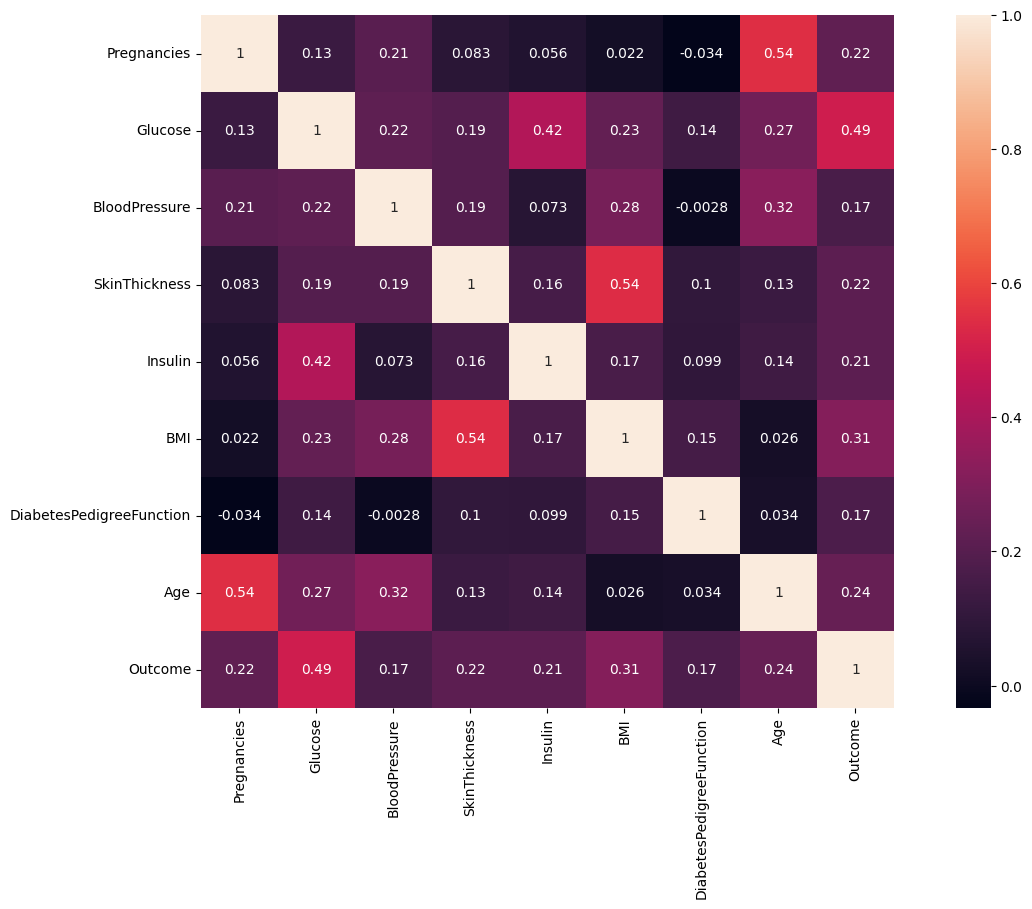

In [56]:
corr = df.corr()
plt.figure(figsize = (16, 9))
sns.heatmap(corr, annot = True, square = True)

### Top correlations

In [57]:
corr_abs = corr.abs()
mask = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)
upper_corr_mat = corr_abs.where(mask)
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values(ascending=False)

print("Top 5 correlations:")
print(sorted_mat.head(5))

Top 5 correlations:
Age      Pregnancies      0.544341
BMI      SkinThickness    0.542398
Outcome  Glucose          0.492928
Insulin  Glucose          0.420157
Age      BloodPressure    0.324595
dtype: float64


#### Here, we can see that Age-Pregnancies, Glucose-Outcome, BMI-SkinThickness has the biggest correlation

#### Age - Pregnancies

In [58]:
df_clean = df_ori.copy()
df_clean.loc[df_clean['Age'] == 0, 'Age'] = np.nan
df_clean.loc[df_clean['Pregnancies'] == 0, 'Pregnancies'] = np.nan

df_clean = df_clean.dropna(subset=['Age', 'Pregnancies'])

fig = px.scatter(df_clean, 
                 x='Age', 
                 y='Pregnancies',
                 trendline="ols",
                 trendline_color_override="green")
fig.show()

#### BMI - SkinThickness

In [59]:
df_clean = df_ori.copy()
df_clean.loc[df_clean['BMI'] == 0, 'BMI'] = np.nan
df_clean.loc[df_clean['SkinThickness'] == 0, 'SkinThickness'] = np.nan

df_clean = df_clean.dropna(subset=['BMI', 'SkinThickness'])

fig = px.scatter(df_clean, 
                 x='BMI', 
                 y='SkinThickness',
                 trendline="ols",
                 trendline_color_override="green")
fig.show()

#### Diabetes Status - Glucose

In [60]:
df_clean = df_ori.copy()
df_clean.loc[df_clean['Glucose'] == 0, 'Glucose'] = np.nan

df_clean = df_clean.dropna(subset=['Glucose'])

In [61]:
import plotly.express as px

# Create a histogram with separate colors for diabetes and non-diabetes
fig = px.histogram(df_clean, x='Glucose', color='Outcome', 
                   histnorm='probability density', marginal='rug', 
                   title='Distribution of Glucose Levels by Outcome')

# Add annotations to highlight the difference in glucose levels
mean_glucose_diabetes = df_clean[df_clean['Outcome'] == 1]['Glucose'].mean()
mean_glucose_non_diabetes = df_clean[df_clean['Outcome'] == 0]['Glucose'].mean()

fig.add_annotation(x=mean_glucose_diabetes, y=0.02,
                   text="Mean Glucose (Diabetes)",
                   showarrow=True, arrowhead=1, ax=-50, ay=-50)

fig.add_annotation(x=mean_glucose_non_diabetes, y=0.02,
                   text="Mean Glucose (Non-Diabetes)",
                   showarrow=True, arrowhead=1, ax=-50, ay=-50)

# Show the figure
fig.show()


In [62]:
import plotly.express as px

# Calculate mean glucose levels for diabetes and non-diabetes groups
mean_glucose_diabetes = df_clean[df_clean['Outcome'] == 1]['Glucose'].mean()
mean_glucose_non_diabetes = df_clean[df_clean['Outcome'] == 0]['Glucose'].mean()

# Create a DataFrame for plotting
data = {
    'Outcome': ['Diabetes', 'Non-Diabetes'],
    'Mean Glucose': [mean_glucose_diabetes, mean_glucose_non_diabetes]
}
df_plot = pd.DataFrame(data)

# Create a bar plot
fig = px.bar(df_plot, x='Outcome', y='Mean Glucose', 
             color='Outcome', title='Mean Glucose Levels by Outcome',
             labels={'Mean Glucose': 'Mean Glucose Levels'})

# Show the figure
fig.show()


### Insulin - Glucose

In [63]:
df_clean = df_ori.copy()
df_clean.loc[df_clean['Insulin'] == 0, 'Insulin'] = np.nan
df_clean.loc[df_clean['Glucose'] == 0, 'Glucose'] = np.nan

df_clean = df_clean.dropna(subset=['Insulin', 'Glucose'])

fig = px.scatter(df_clean, 
                 x='Glucose', 
                 y='Insulin',
                 trendline="ols",
                 trendline_color_override="green")
fig.show()

### Age - BP

In [64]:
df_clean = df_ori.copy()
df_clean.loc[df_clean['Age'] == 0, 'Age'] = np.nan
df_clean.loc[df_clean['BloodPressure'] == 0, 'BloodPressure'] = np.nan

df_clean = df_clean.dropna(subset=['Age', 'BloodPressure'])

fig = px.scatter(df_clean, 
                 x='Age', 
                 y='BloodPressure',
                 trendline="ols",
                 trendline_color_override="green")
fig.show()

In [65]:
outcome_corr = corr['Outcome'].drop('Outcome').sort_values(ascending=True)
top_corr_features = outcome_corr.abs().nlargest(5)

print("Top 5 features with highest correlation with 'Outcome':")
for feature in top_corr_features.index:
    corr_value = outcome_corr[feature]
    print(f"Feature: {feature} - Value: {corr_value:.4f}")

Top 5 features with highest correlation with 'Outcome':
Feature: Glucose - Value: 0.4929
Feature: BMI - Value: 0.3119
Feature: Age - Value: 0.2384
Feature: Pregnancies - Value: 0.2219
Feature: SkinThickness - Value: 0.2153


### Feature Importance based on Diabetes Status

In [66]:
fig = px.bar(x=outcome_corr.values, 
             y=outcome_corr.index, 
             labels={'y': '', 'x': 'Correlation with Outcome'},
             orientation='h',
             color=outcome_corr.values,  # Assign different colors based on correlation values
             color_continuous_scale='sunset')
fig.show()

In [67]:
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']

In [68]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_names = df.columns.tolist()

skb = SelectKBest(score_func=f_classif, k=5)  # Set f_classif as our criteria to select features

# Train and transform the dataset according to SelectKBest
X_data_new = skb.fit_transform(X, y)

# Print the results
print('Number of features before feature selection: {}'.format(X.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

# Get the scores and indices of selected features
scores = skb.scores_
selected_indices = skb.get_support(indices=True)

# Print the name and score of the selected features
for i, feature_index in enumerate(selected_indices):
    print('- {} (Score: {:.3f})'.format(feature_names[feature_index], scores[feature_index]))


Number of features before feature selection: 8
Number of features after feature selection: 5
- Pregnancies (Score: 39.670)
- Glucose (Score: 245.859)
- SkinThickness (Score: 37.233)
- BMI (Score: 82.562)
- Age (Score: 46.141)


In [69]:
import plotly.express as px

# Zip feature names and scores, sort by score in descending order
sorted_features = sorted(zip([feature_names[i] for i in selected_indices], [scores[i] for i in selected_indices]), key=lambda x: x[1], reverse=True)

# Unzip sorted features
sorted_feature_names, sorted_scores = zip(*sorted_features)

# Create bar chart using Plotly Express
fig = px.bar(x=list(sorted_feature_names), y=list(sorted_scores), 
             title='Feature Scores of Select K Best (Sorted)',
             labels={'y': 'Score', 'x': 'Feature'})

# Show figure
fig.show()


# BMI

In [70]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [71]:
def generate_intervals(start, end, interval):
    bmi_intervals = []
    current_val = start
    while current_val < end:
        next_val = min(current_val + interval - 1, end)
        bmi_intervals.append((current_val, next_val))
        current_val = next_val + 1
    return bmi_intervals

In [72]:
import math

def categorize(val, interval):
    val = math.floor(val)
    for i, (start, end) in enumerate(interval):
        if start <= val <= end:
            return f"{start}-{end}"
    print(f"No group found for value {val}")
    return "Outside value range"

In [73]:
start_bmi = 10
end_bmi = 70
interval_size_bmi = 5

bmi_intervals = generate_intervals(start_bmi, end_bmi, interval_size_bmi)
print(bmi_intervals)

[(10, 14), (15, 19), (20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69)]


In [74]:
df['BMI_Group'] = df['BMI'].apply(lambda x: categorize(x, bmi_intervals))

In [75]:
bmi_group_counts = df['BMI_Group'].value_counts().reset_index()
bmi_group_counts.columns = ['BMI_Group', 'Count']

bmi_group_counts['BMI_Group_Lower'] = bmi_group_counts['BMI_Group'].str.split('-').str[0].astype(int)
age_group_counts = bmi_group_counts.sort_values(by='BMI_Group_Lower')

# Plotting
fig = px.bar(bmi_group_counts, x='BMI_Group', y='Count', color='Count',
             labels={'Count': 'Number of Data Points'},
             title='Number of Data Points in Each BMI Group',
             height=500)



# Update hover mode and display the figure
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(hovermode='x')
fig.show()

In [76]:
removed_bmi_groups = bmi_group_counts[bmi_group_counts['Count'] < 5]['BMI_Group']
print("Removed bmi group(s):", removed_bmi_groups.tolist())

df = df[~df['BMI_Group'].isin(removed_bmi_groups)]

Removed bmi group(s): ['55-59', '65-69']


In [77]:
bmi_group_counts = df['BMI_Group'].value_counts().reset_index()
bmi_group_counts.columns = ['BMI_Group', 'Count']

# Plotting
fig = px.bar(bmi_group_counts, x='BMI_Group', y='Count', color='Count',
             labels={'Count': 'Number of Data Points'},
             title='Number of Data Points in Each BMI Group with Outlier Group(s) Removed',
             height=500)

# Update hover mode and display the figure
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(hovermode='x')
fig.show()

In [78]:
total_count = df['BMI_Group'].value_counts().reset_index()
total_count.columns = ['BMI_Group', 'Total_Count']

diabetes_count = df.groupby('BMI_Group')['Outcome'].sum().reset_index()

# Merge total count and diabetes count dataframes
diabetes_percentage = pd.merge(total_count, diabetes_count, on='BMI_Group')

diabetes_percentage['Percentage'] = (diabetes_percentage['Outcome'] / diabetes_percentage['Total_Count']) * 100

# Assuming the code above has been executed to generate diabetes_percentage DataFrame

# Sort the DataFrame by BMI_Group in ascending order
diabetes_percentage_sorted = diabetes_percentage.sort_values(by='BMI_Group')

# Plotting
fig = px.bar(diabetes_percentage_sorted, x='BMI_Group', y='Percentage', color='Percentage',
             labels={'Percentage': 'Percentage of Individuals with Diabetes'},
             title='Percentage of Individuals with Diabetes in Each BMI Group',
             hover_data={'Percentage': True},
             height=500)

# Update hover mode and display the figure
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')
fig.update_layout(hovermode='x')
fig.show()


### Divide the age into groups

In [79]:
start_age = 20
end_age = 90
interval_size_age = 5

# Generate age intervals dynamically
age_intervals = generate_intervals(start_age, end_age, interval_size_age)
print(age_intervals)

[(20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 89)]


In [80]:
df['Age_Group'] = df['Age'].apply(lambda x: categorize(x, age_intervals))

/var/folders/f6/mgwjx_cs0bl6g_dbgdp8jfq40000gn/T/ipykernel_52563/2678088105.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
age_group_counts = df['Age_Group'].value_counts().reset_index()
age_group_counts.columns = ['Age_Group', 'Count']

age_group_counts['Age_Group_Lower'] = age_group_counts['Age_Group'].str.split('-').str[0].astype(int)
age_group_counts = age_group_counts.sort_values(by='Age_Group_Lower')

# Plotting
fig = px.bar(age_group_counts, x='Age_Group', y='Count', color='Count',
             labels={'Count': 'Number of Data Points'},
             title='Number of Data Points in Each Age Group',
             height=500)



# Update hover mode and display the figure
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(hovermode='x')
fig.show()

### If less than 5, remove

In [82]:
removed_age_groups = age_group_counts[age_group_counts['Count'] < 5]['Age_Group']
print("Removed age group(s):", removed_age_groups.tolist())

df = df[~df['Age_Group'].isin(removed_age_groups)]

Removed age group(s): ['70-74', '80-84']


In [83]:
age_group_counts = df['Age_Group'].value_counts().reset_index()
age_group_counts.columns = ['Age_Group', 'Count']

# Plotting
fig = px.bar(age_group_counts, x='Age_Group', y='Count', color='Count',
             labels={'Count': 'Number of Data Points'},
             title='Number of Data Points in Each Age Group with Outlier Group(s) Removed',
             height=500)

# Update hover mode and display the figure
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(hovermode='x')
fig.show()

In [84]:
# Calculate the total count of individuals in each age group
total_count = df['Age_Group'].value_counts().reset_index()
total_count.columns = ['Age_Group', 'Total_Count']

# Calculate the count of individuals with diabetes in each age group
diabetes_count = df.groupby('Age_Group')['Outcome'].sum().reset_index()

# Merge total count and diabetes count dataframes
diabetes_percentage = pd.merge(total_count, diabetes_count, on='Age_Group')

# Calculate the percentage of individuals with diabetes in each age group
diabetes_percentage['Percentage'] = (diabetes_percentage['Outcome'] / diabetes_percentage['Total_Count']) * 100

# Plotting
fig = px.bar(diabetes_percentage, x='Age_Group', y='Percentage', color='Percentage',
             labels={'Percentage': 'Percentage of Individuals with Diabetes'},
             title='Percentage of Individuals with Diabetes in Each Age Group',
             hover_data={'Percentage': True},
             height=500)

# Update hover mode and display the figure
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')
fig.update_layout(hovermode='x')
fig.show()

In [85]:
df.drop(columns=['Age'], inplace=True)
age_group_mapping = {f'{start}-{end}': i + 1 for i, (start, end) in enumerate(age_intervals)}
bmi_group_mapping = {f'{start}-{end}': i + 1 for i, (start, end) in enumerate(bmi_intervals)}


df['Age_Group'] = df['Age_Group'].map(age_group_mapping)
print(age_group_mapping)

df['BMI_Group'] = df['BMI_Group'].map(bmi_group_mapping)
print(bmi_group_mapping)

{'20-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10, '70-74': 11, '75-79': 12, '80-84': 13, '85-89': 14}
{'10-14': 1, '15-19': 2, '20-24': 3, '25-29': 4, '30-34': 5, '35-39': 6, '40-44': 7, '45-49': 8, '50-54': 9, '55-59': 10, '60-64': 11, '65-69': 12}


### Train-test split (70:30)

In [86]:
df_ori

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
from sklearn.model_selection import train_test_split

X = df_ori.drop(columns=['Outcome'])  # Features
y = df_ori['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [88]:
selected_columns = ['Age', 'Glucose', 'BMI', 'Pregnancies', 'SkinThickness']
x_train_selected = x_train[selected_columns]
x_test_selected = x_test[selected_columns]

In [89]:
X_grouped = df.drop(columns=['Outcome'])  # Features
y_grouped = df['Outcome']

x_train_grouped, x_test_grouped, y_train_grouped, y_test_grouped = train_test_split(X_grouped, y_grouped, test_size=0.30, random_state=0)

In [90]:
selected_columns = ['Age_Group', 'Glucose', 'BMI_Group', 'Pregnancies', 'SkinThickness']

x_train_selected_grouped = x_train_grouped[selected_columns]
x_test_selected_grouped = x_test_grouped[selected_columns]

### Logistic Regression

/Users/nichdylan/Documents/DVID/Assignment 2/diabetesEnvironment/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



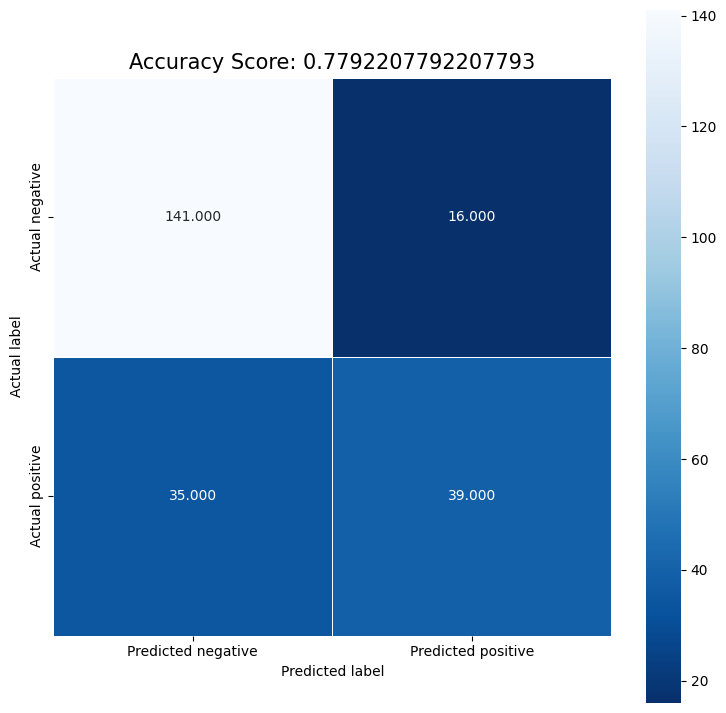

In [101]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)
score = lr.score(x_test, y_test)

predictions = lr.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

x_labels = ['Predicted negative', 'Predicted positive']
y_labels = ['Actual negative', 'Actual positive']

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.xticks(ticks=[0.5, 1.5], labels=x_labels)
plt.yticks(ticks=[0.5, 1.5], labels=y_labels)

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

/Users/nichdylan/Documents/DVID/Assignment 2/diabetesEnvironment/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



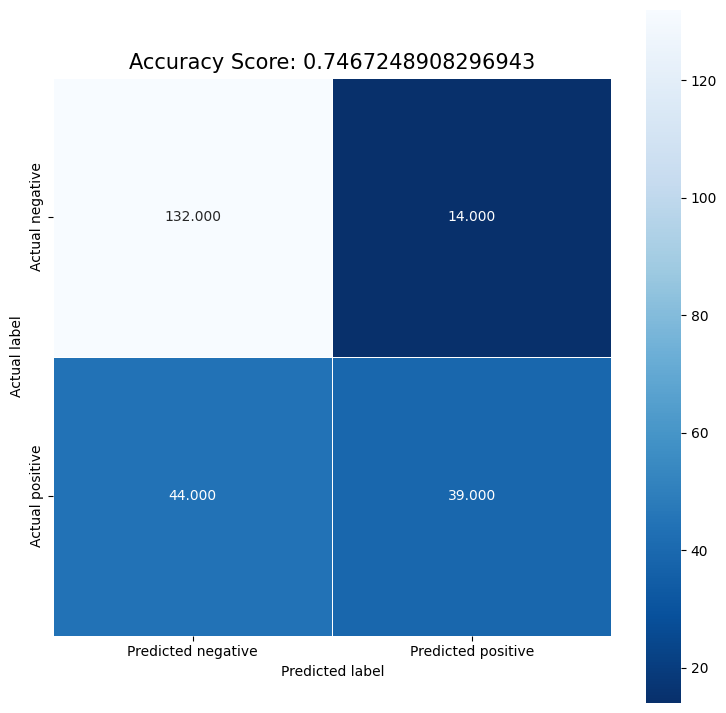

In [100]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train_grouped, y_train_grouped)
score = lr.score(x_test_grouped, y_test_grouped)

predictions = lr.predict(x_test_grouped)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_grouped, predictions)

x_labels = ['Predicted negative', 'Predicted positive']
y_labels = ['Actual negative', 'Actual positive']

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.xticks(ticks=[0.5, 1.5], labels=x_labels)
plt.yticks(ticks=[0.5, 1.5], labels=y_labels)

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### LSTM

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD

In [94]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5238 - loss: 1.4539 - val_accuracy: 0.4805 - val_loss: 0.7639
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5285 - loss: 0.7326 - val_accuracy: 0.4156 - val_loss: 0.6847
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4726 - loss: 0.6821 - val_accuracy: 0.4805 - val_loss: 0.6725
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5817 - loss: 0.6620 - val_accuracy: 0.6797 - val_loss: 0.6308
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6322 - loss: 0.6414 - val_accuracy: 0.6797 - val_loss: 0.6204
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6337 - loss: 0.6223 - val_accuracy: 0.6797 - val_loss: 0.6263
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 0.6193 - val_accuracy: 0.6797 - val_loss: 0.6152
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 0.6182 - val_accuracy: 0.6797 - val_loss: 0.6119

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


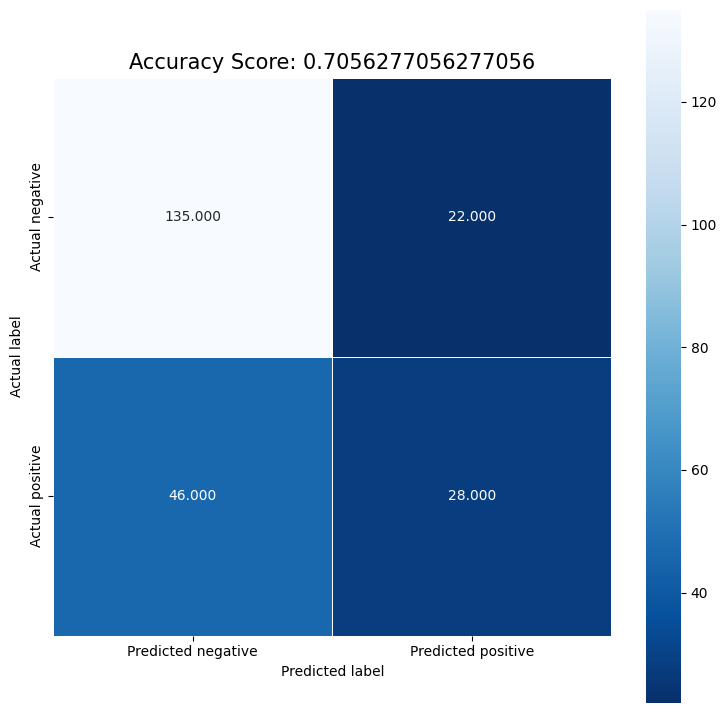

In [102]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(x_test)
y_pred_binary = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

x_labels = ['Predicted negative', 'Predicted positive']
y_labels = ['Actual negative', 'Actual positive']

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.xticks(ticks=[0.5, 1.5], labels=x_labels)
plt.yticks(ticks=[0.5, 1.5], labels=y_labels)

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [103]:
model = Sequential()
model.add(Input(shape=(x_train_grouped.shape[1],)))
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train_grouped, y_train_grouped, epochs=100, batch_size=64, validation_data=(x_test_grouped, y_test_grouped))

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6063 - loss: 1.8439 - val_accuracy: 0.3668 - val_loss: 1.1400
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4413 - loss: 0.9897 - val_accuracy: 0.6201 - val_loss: 0.8792
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 0.7718 - val_accuracy: 0.5677 - val_loss: 0.6704
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6577 - loss: 0.6452 - val_accuracy: 0.6681 - val_loss: 0.6301
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - loss: 0.6233 - val_accuracy: 0.6856 - val_loss: 0.6075
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - loss: 0.6121 - val_accuracy: 0.7162 - val_loss: 0.5805
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - loss: 0.5848 - val_accuracy: 0.7293 - val_loss: 0.5730
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6984 - loss: 0.5667 - val_accuracy: 0.6900 - val_loss: 0.5880

In [107]:
model = Sequential()
model.add(Input(shape=(x_train_selected_grouped.shape[1],)))
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train_selected_grouped, y_train_grouped, epochs=10000, batch_size=64, validation_data=(x_test_selected_grouped, y_test_grouped))

Epoch 1/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5846 - loss: 0.9611 - val_accuracy: 0.4148 - val_loss: 0.7085
Epoch 2/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5969 - loss: 0.6943 - val_accuracy: 0.6376 - val_loss: 0.7149
Epoch 3/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.7040 - val_accuracy: 0.5546 - val_loss: 0.6696
Epoch 4/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - loss: 0.6609 - val_accuracy: 0.6376 - val_loss: 0.6638
Epoch 5/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5930 - loss: 0.6893 - val_accuracy: 0.6376 - val_loss: 0.6592
Epoch 6/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.6466 - val_accuracy: 0.5939 - val_loss: 0.6638
Epoch 7/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5831 - loss: 0.6558 - val_accuracy: 0.6376 - val_loss: 0.6565
Epoch 8/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - loss: 0.6407 - val_accuracy: 0.6463 - 